In [22]:
import sys
import subprocess
import os
import matplotlib
import matplotlib.pyplot as plt
import pylab
import pandas as pd
from xml.etree import ElementTree as ET

pylab.rcParams['figure.figsize'] = (12, 6)
pd.options.display.max_rows = 10

os.chdir("d:/gygCode/myORE")
ore_exe = "d:/gygCode/myORE/ore.exe"
print('python enviroment:', os.path.abspath('.'))

python enviroment: d:\gygCode\myORE


In [10]:
initialdata = "example/example14/ore.xml"

root = ET.parse(initialdata).getroot()

root.find('Setup/Parameter[@name ="portfolioFile"]').text = 'portfolio_swap.xml'
root.find('Analytics/Analytic[@type ="simulation"]').find('Parameter[@name="active"]').text = 'N'
root.find('Analytics/Analytic[@type ="xva"]').find('Parameter[@name="active"]').text = 'N'

ET.ElementTree(root).write(initialdata, encoding='utf-8', xml_declaration=True)

res = subprocess.call([ore_exe, initialdata])
print('res:', res)

res: 0


'npv:'

,#TradeId,TradeType,Maturity,NPV,NpvCurrency,NPV(Base),BaseCurrency
0,Swap_20,Swap,2036-03-03,-269479.538492,EUR,-269479.538492,EUR


'Expected Exposure:'

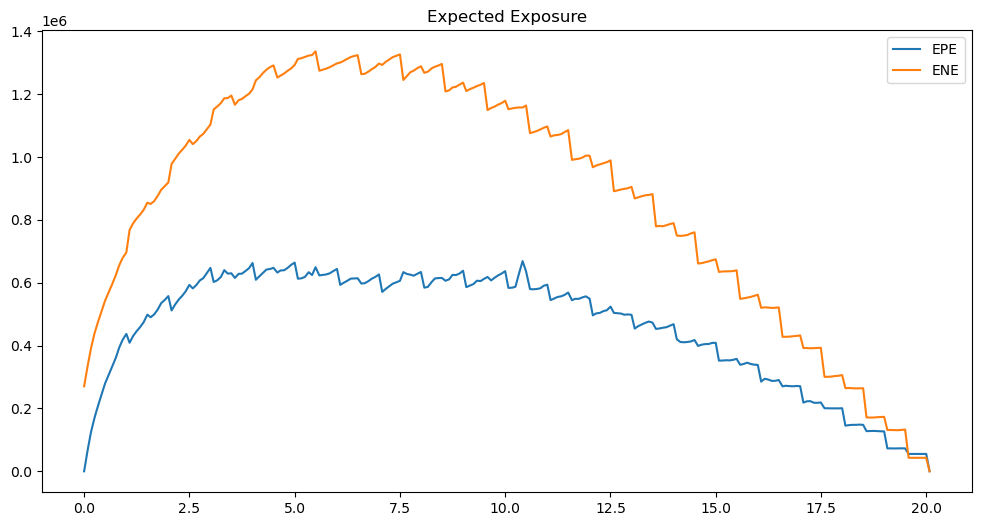

In [26]:
data = pd.read_csv('example/example2/Output/npv.csv')
data = data[['#TradeId','TradeType','Maturity','NPV','NpvCurrency','NPV(Base)','BaseCurrency']]
display('npv:',data)

display('Expected Exposure:')
data = pd.read_csv('example/example2/Output/exposure_trade_Swap_20.csv')
plt.plot(data['Time'], data[['EPE','ENE']]), plt.legend(['EPE','ENE']),plt.title('Expected Exposure'),plt.show();
